# Lab 4b: Data Cleaning and Analysis

Welcome to Lab 4b!

This lab is a more free-form challenge than the previous ones you have completed. What I would like you to do is to demonstrate some of what you have learned in the previous exercises with another dataset.

<img src="images/london2012.gif"/>

First, by running the cell below we can display a sample of 25 rows from a CSV file containing records about athletes who competed in the London 2012 Olympics. This is a data set produced summarizing data prepared by the Guardian newspaper originally found [here](https://docs.google.com/spreadsheets/d/1CKSOQcrPDhxniv-V1FVFAo2rVXrguBCOFAsGZ_IwPJo/edit#gid=0).

#@Author: Jonas Örnfelt

In [1]:
import pandas as pd
#pd.read_csv('https://raw.githubusercontent.com/djcomlab/olympics-graphs/master/london2012-olympics-v3.csv').sample(25)

In [2]:
olympics_df = pd.read_csv('https://raw.githubusercontent.com/djcomlab/olympics-graphs/master/london2012-olympics-v3.csv')
# Create copy of dataset
raw_olympics_df = olympics_df.copy()
olympics_df.head()

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze
0,Elaine,Brazil,29,168.0,64.0,F,11/01/1982,Football,Women's Football,NaN,NaN,NaN,NaN
1,Jai Bhagwan,India,27,NaN,NaN,M,05/11/1985,Boxing,Men's Light (60kg),NaN,NaN,NaN,NaN
2,Manoj Kumar,India,25,NaN,NaN,M,12/10/1986,Boxing,Men's Light Welter (64kg),NaN,NaN,NaN,NaN
3,Vijender,India,26,NaN,NaN,M,10/29/1985,Boxing,Men's Middle (75kg),NaN,NaN,NaN,NaN
4,A G Kruger,United States of America,33,193.0,125.0,M,2/18/1979,Athletics,Men's Hammer Throw,NaN,NaN,NaN,NaN


In [3]:
# How many rows are in this data set? ✔
amount_of_rows = olympics_df.shape[0]
amount_of_rows

10422

In [4]:
olympics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           10422 non-null  object 
 1   Country        10422 non-null  object 
 2   Age            10422 non-null  int64  
 3   Height (cm)    9861 non-null   float64
 4   Weight (kg)    9136 non-null   float64
 5   Sex            10422 non-null  object 
 6   Date of birth  10422 non-null  object 
 7   Sport          10421 non-null  object 
 8   Event          10421 non-null  object 
 9   Medal winner?  1027 non-null   object 
 10  Gold           338 non-null    object 
 11  Silver         355 non-null    object 
 12  Bronze         406 non-null    float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [5]:
olympics_df.describe()

,Age,Height (cm),Weight (kg),Bronze
count,10422.000000,9861.000000,9136.000000,406.000000
mean,26.064863,176.885813,72.845884,0.686345
std,5.436800,11.292207,16.078648,0.390414
min,13.000000,132.000000,36.000000,0.076000
25%,22.000000,169.000000,61.000000,0.250000
50%,25.000000,176.000000,70.000000,1.000000
75%,29.000000,185.000000,81.000000,1.000000
max,71.000000,221.000000,218.000000,2.000000


In [6]:
# Remove incomlete rows

# Drop duplicates since they impact the analysis. 
olympics_df.drop_duplicates(inplace = True) 

# Also remove ID and other since they won't assist in the analysis
# olympics_df.drop(columns = ['ID', 'other'], inplace = True)

num_cols = olympics_df.select_dtypes(['int64', 'float64']).columns.tolist()
obj_cols = olympics_df.select_dtypes('O').columns.tolist()

# Print unique values
for i in obj_cols:
    print(i, ':', olympics_df[i].nunique())

Name : 10402
Country : 205
Sex : 2
Date of birth : 5384
Sport : 43
Event : 773
Medal winner? : 3
Gold : 15
Silver : 14


In [7]:
# Investigate missing data
# Function for printing table of percentage of missing data in dataframe
def get_missing(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)
    return pd.concat([total, percent], axis = 1, keys = ['Total', '% Missing'])

get_missing(olympics_df)

,Total,% Missing
Gold,10084,96.76
Silver,10067,96.59
Bronze,10016,96.10
Medal winner?,9395,90.15
Weight (kg),1286,12.34
Height (cm),561,5.38
Sport,1,0.01
Event,1,0.01
Name,0,0.00
Country,0,0.00


In [8]:
# Remove incomlete rows ✔
""" 
Because not every person who plays the game / sport will win, the medals can stay like they are in the dataset.
However, there are also empty columns for height, weight, and 1 for sport and event
Let's disregard the high number of missing values in the height and weight features since we will still have a dataset with sufficient numbers of observations for the analysis. 
"""
olympics_df.dropna(subset = ['Weight (kg)', 'Height (cm)', 'Sport', 'Event'], inplace = True)
get_missing(olympics_df)

,Total,% Missing
Gold,8766,96.66
Silver,8752,96.50
Bronze,8719,96.14
Medal winner?,8159,89.97
Name,0,0.00
Country,0,0.00
Age,0,0.00
Height (cm),0,0.00
Weight (kg),0,0.00
Sex,0,0.00


In [9]:
# How many rows remain after your filters are applied? ✔
olympics_df.shape[0]

9069

In [10]:
# We can create age groups and assign the players accordingly
age_groups = [0, 29, 45, 60, 100]
olympics_df['Age Group'] = pd.cut(olympics_df['Age'], bins = age_groups)
olympics_df.head()

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group
0,Elaine,Brazil,29,168.0,64.0,F,11/01/1982,Football,Women's Football,NaN,NaN,NaN,NaN,"(0, 29]"
4,A G Kruger,United States of America,33,193.0,125.0,M,2/18/1979,Athletics,Men's Hammer Throw,NaN,NaN,NaN,NaN,"(29, 45]"
5,A Lam Shin,Republic of Korea,25,167.0,57.0,F,9/23/1986,Fencing,Women's Individual Epee; Women's Team Epee,YES,NaN,0.5,NaN,"(0, 29]"
6,Aaron Brown,Canada,20,198.0,79.0,M,5/27/1992,Athletics,Men's 200m,NaN,NaN,NaN,NaN,"(0, 29]"
7,Aaron Sarmiento,Spain,25,180.0,72.0,M,8/26/1986,Sailing,Men's 470,NaN,NaN,NaN,NaN,"(0, 29]"


In [11]:
# Create BMI feature
# Formula: BMI = Weight (kg) / Height (m) ** 2
olympics_df['bmi'] = olympics_df['Weight (kg)'] / ((olympics_df['Height (cm)'] / 100) ** 2)
olympics_df.head()

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group,bmi
0,Elaine,Brazil,29,168.0,64.0,F,11/01/1982,Football,Women's Football,NaN,NaN,NaN,NaN,"(0, 29]",22.675737
4,A G Kruger,United States of America,33,193.0,125.0,M,2/18/1979,Athletics,Men's Hammer Throw,NaN,NaN,NaN,NaN,"(29, 45]",33.557948
5,A Lam Shin,Republic of Korea,25,167.0,57.0,F,9/23/1986,Fencing,Women's Individual Epee; Women's Team Epee,YES,NaN,0.5,NaN,"(0, 29]",20.438166
6,Aaron Brown,Canada,20,198.0,79.0,M,5/27/1992,Athletics,Men's 200m,NaN,NaN,NaN,NaN,"(0, 29]",20.151005
7,Aaron Sarmiento,Spain,25,180.0,72.0,M,8/26/1986,Sailing,Men's 470,NaN,NaN,NaN,NaN,"(0, 29]",22.222222


In [12]:
# Assign bmi groups based on personal bmi
import numpy as np

olympics_df['bmi group'] = np.where(olympics_df['bmi'] <= 18.5, 'Underweight',
                                    np.where(olympics_df['bmi'] < 25, 'Average',
                                             np.where(olympics_df['bmi'] < 30, 'Overweight',
                                                      np.where(olympics_df['bmi'] >= 30, 'Obese', 'NA'))))

olympics_df.head()

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group,bmi,bmi group
0,Elaine,Brazil,29,168.0,64.0,F,11/01/1982,Football,Women's Football,NaN,NaN,NaN,NaN,"(0, 29]",22.675737,Average
4,A G Kruger,United States of America,33,193.0,125.0,M,2/18/1979,Athletics,Men's Hammer Throw,NaN,NaN,NaN,NaN,"(29, 45]",33.557948,Obese
5,A Lam Shin,Republic of Korea,25,167.0,57.0,F,9/23/1986,Fencing,Women's Individual Epee; Women's Team Epee,YES,NaN,0.5,NaN,"(0, 29]",20.438166,Average
6,Aaron Brown,Canada,20,198.0,79.0,M,5/27/1992,Athletics,Men's 200m,NaN,NaN,NaN,NaN,"(0, 29]",20.151005,Average
7,Aaron Sarmiento,Spain,25,180.0,72.0,M,8/26/1986,Sailing,Men's 470,NaN,NaN,NaN,NaN,"(0, 29]",22.222222,Average


In [13]:
# Finally, calculate the [Body Mass Index (BMI)](https://en.wikipedia.org/wiki/Body_mass_index)
# for each athlete in the data set, and display the top 10 rows for male athletes, and again for female athletes. ✔

# One way to do it...
#bmi_df = olympics_df.groupby('Sex')["bmi"].nlargest(10)
#bmi_df

# Sort by bmi and loc specific genders
# Bmi can be sorted with ascending or not...
bmi_df = olympics_df.sort_values("bmi", ascending=True)
bmi_df_male = bmi_df.loc[bmi_df["Sex"] == 'M'].round(2)
bmi_df_female = bmi_df.loc[bmi_df["Sex"] == 'F'].round(2)
# Top ten male 
bmi_df_male[:10]

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group,bmi,bmi group
6006,Marcin Mozdzonek,Poland,27,211.0,51.0,M,02/09/1985,Volleyball,Men's Volleyball,NaN,NaN,NaN,NaN,"(0, 29]",11.46,Underweight
2829,Ercument Olgundeniz,Turkey,36,198.0,50.0,M,07/07/1976,Athletics,Men's Discus Throw,NaN,NaN,NaN,NaN,"(29, 45]",12.75,Underweight
1982,Cristian Tello,Spain,20,180.0,43.0,M,08/11/1991,Football,Men's Football,NaN,NaN,NaN,NaN,"(0, 29]",13.27,Underweight
2913,Etienne Lalonde Turbide,Canada,23,195.0,59.0,M,05/12/1989,Fencing,Men's Individual Foil,NaN,NaN,NaN,NaN,"(0, 29]",15.52,Underweight
9444,Tim Lips,Netherlands,26,180.0,52.0,M,10/07/1985,Equestrian,Individual Eventing; Team Eventing; ONCARLOS,NaN,NaN,NaN,NaN,"(0, 29]",16.05,Underweight
5352,Kyriakos Ioannou,Cyprus,28,193.0,60.0,M,7/26/1984,Athletics,Men's High Jump,NaN,NaN,NaN,NaN,"(0, 29]",16.11,Underweight
3172,Franck de Almeida,Brazil,29,173.0,49.0,M,02/06/1983,Athletics,Men's Marathon,NaN,NaN,NaN,NaN,"(0, 29]",16.37,Underweight
10223,Yuan Cao,People's Republic of China,17,160.0,42.0,M,02/07/1995,Diving,Men's Synchronised 10m Platform,YES,0.5,NaN,NaN,"(0, 29]",16.41,Underweight
4124,Jake Kaminski,United States of America,23,208.0,71.0,M,08/11/1988,Archery,Men's Individual; Men's Team,YES,NaN,0.33,NaN,"(0, 29]",16.41,Underweight
6836,Mohammed Ahmed,Canada,21,190.0,60.0,M,01/05/1991,Athletics,Men's 10;000m,NaN,NaN,NaN,NaN,"(0, 29]",16.62,Underweight


In [14]:
# Top ten rows from female ascending = True
bmi_df_female[:10]

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group,bmi,bmi group
2480,Doreen Amata,Nigeria,24,198.0,54.0,F,05/06/1988,Athletics,Women's High Jump,NaN,NaN,NaN,NaN,"(0, 29]",13.77,Underweight
4522,Joanna Lochowska,Poland,23,190.0,53.0,F,11/17/1988,Weightlifting,Women's 53kg,NaN,NaN,NaN,NaN,"(0, 29]",14.68,Underweight
9828,Vivian Jepkemoi Cheruiyot,Kenya,28,160.0,39.0,F,09/11/1983,Athletics,Women's 5000m; Women's 10;000m,YES,NaN,NaN,1.0,"(0, 29]",15.23,Underweight
7999,Rene Kalmer,South Africa,31,178.0,49.0,F,11/03/1980,Athletics,Women's Marathon,NaN,NaN,NaN,NaN,"(29, 45]",15.47,Underweight
5710,Luan Gabriel,Dominica,16,170.0,45.0,F,05/03/1996,Athletics,Women's 200m,NaN,NaN,NaN,NaN,"(0, 29]",15.57,Underweight
3541,Hanna Demydova,Ukraine,25,178.0,50.0,F,04/08/1987,Athletics,Women's Triple Jump,NaN,NaN,NaN,NaN,"(0, 29]",15.78,Underweight
844,Anna Incerti,Italy,32,168.0,45.0,F,1/19/1980,Athletics,Women's Marathon,NaN,NaN,NaN,NaN,"(29, 45]",15.94,Underweight
9919,Werknesh Kidane,Ethiopia,31,160.0,41.0,F,01/07/1981,Athletics,Women's 10;000m,NaN,NaN,NaN,NaN,"(29, 45]",16.02,Underweight
6565,Mhasin Fadlalla,Sudan,18,158.0,40.0,F,2/20/1994,Swimming,Women's 50m Freestyle,NaN,NaN,NaN,NaN,"(0, 29]",16.02,Underweight
3945,Irina Gordeeva,Russian Federation,25,185.0,55.0,F,10/09/1986,Athletics,Women's High Jump,NaN,NaN,NaN,NaN,"(0, 29]",16.07,Underweight


In [15]:
bmi_df_non_ascending = olympics_df.sort_values("bmi", ascending=False)
bmi_df_non_ascending_male = bmi_df_non_ascending.loc[bmi_df_non_ascending["Sex"] == 'M'].round(2)
bmi_df_non_ascending_female = bmi_df_non_ascending.loc[bmi_df_non_ascending["Sex"] == 'F'].round(2)
# Top ten rows male non ascending bmi
bmi_df_non_ascending_male[:10]

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group,bmi,bmi group
8024,Ricardo Blas Jr,Guam,25,185.0,218.0,M,10/19/1986,Judo,Men's +100kg,NaN,NaN,NaN,NaN,"(0, 29]",63.70,Obese
3803,Ian Warner,Canada,22,170.0,160.0,M,5/15/1990,Athletics,Men's 4 x 100m Relay,NaN,NaN,NaN,NaN,"(0, 29]",55.36,Obese
198,Akeem Haynes,Canada,20,168.0,150.0,M,03/11/1992,Athletics,Men's 4 x 100m Relay,NaN,NaN,NaN,NaN,"(0, 29]",53.15,Obese
4000,Itte Detenamo,Nauru,25,170.0,140.0,M,9/22/1986,Weightlifting,Men's +105kg,NaN,NaN,NaN,NaN,"(0, 29]",48.44,Obese
8465,Sang-Guen Jeon,Republic of Korea,31,183.0,158.0,M,2/28/1981,Weightlifting,Men's +105kg,NaN,NaN,NaN,NaN,"(29, 45]",47.18,Obese
7970,Reese Hoffa,United States of America,34,180.0,147.0,M,10/08/1977,Athletics,Men's Shot Put,YES,NaN,NaN,1.0,"(29, 45]",45.37,Obese
2045,Damon Kelly,Australia,28,182.0,149.0,M,12/01/1983,Weightlifting,Men's +105kg,NaN,NaN,NaN,NaN,"(0, 29]",44.98,Obese
9705,Velichko Cholakov,Azerbaijan,30,198.0,170.0,M,01/12/1982,Weightlifting,Men's +105kg,NaN,NaN,NaN,NaN,"(29, 45]",43.36,Obese
4226,Janusz Wojnarowicz,Poland,32,198.0,170.0,M,4/14/1980,Judo,Men's +100kg,NaN,NaN,NaN,NaN,"(29, 45]",43.36,Obese
5069,Kazuomi Ota,Japan,26,183.0,145.0,M,07/01/1986,Weightlifting,Men's +105kg,NaN,NaN,NaN,NaN,"(0, 29]",43.30,Obese


In [16]:
# Top ten rows male non ascending bmi
bmi_df_non_ascending_female[:10]

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group,bmi,bmi group
8991,Sparkle McKnight,Trinidad and Tobago,20,158.0,155.0,F,12/21/1991,Athletics,Women's 4 x 100m Relay,NaN,NaN,NaN,NaN,"(0, 29]",62.09,Obese
3704,Holley Mangold,United States of America,22,173.0,154.0,F,12/22/1989,Weightlifting,Women's +75kg,NaN,NaN,NaN,NaN,"(0, 29]",51.46,Obese
9680,Vanessa Zambotti,Mexico,30,175.0,145.0,F,03/04/1982,Judo,Women's +78kg,NaN,NaN,NaN,NaN,"(29, 45]",47.35,Obese
1901,Claudia Carolina Fajardo Rodriguez,Honduras,26,160.0,117.0,F,9/26/1985,Shooting,Women's 10m Air Pistol,NaN,NaN,NaN,NaN,"(0, 29]",45.70,Obese
5809,Lulu Zhou,People's Republic of China,24,175.0,131.0,F,19/03/1988,Weightlifting,Women's +75kg,YES,1,NaN,NaN,"(0, 29]",42.78,Obese
3467,Gulsah Kocaturk,Turkey,26,178.0,135.0,F,01/01/1986,Judo,Women's +78kg,NaN,NaN,NaN,NaN,"(0, 29]",42.61,Obese
9905,Wen Tong,People's Republic of China,29,180.0,130.0,F,01/02/1983,Judo,Women's +78kg,YES,NaN,NaN,1.0,"(0, 29]",40.12,Obese
9904,Wen-Hua Li,Taipei (Chinese Taipei),22,180.0,130.0,F,12/03/1989,Athletics,Women's Discus Throw,NaN,NaN,NaN,NaN,"(0, 29]",40.12,Obese
6569,Mi-Ran Jang,Republic of Korea,28,170.0,115.0,F,10/09/1983,Weightlifting,Women's +75kg,NaN,NaN,NaN,NaN,"(0, 29]",39.79,Obese
6941,Na-Young Kim,Republic of Korea,24,189.0,140.0,F,01/06/1988,Judo,Women's +78kg,NaN,NaN,NaN,NaN,"(0, 29]",39.19,Obese


In [17]:
# How many countries are present in the data set? ✔
# Count unique entries of countries to get number of countries that participated
print(f"Number of countries participated: {olympics_df['Country'].nunique()}")

Number of countries participated: 197


In [18]:
# We can see that some names appear several times since there's 9069 rows and 9053 unique names
print(f"Number of players participated: {olympics_df['Name'].nunique()}")

Number of players participated: 9053


In [19]:
# Which athlete competed in the most events? ✔
#name_counts = pd.DataFrame(olympics_df['Name'].value_counts())
name_counts_df = olympics_df["Name"].value_counts().rename_axis('Name').reset_index(name='Count')
name_counts_df = name_counts_df.sort_values(by=['Count'], ascending=False)

print(f"Athlete that competed in the most events: {name_counts_df.iloc[0]['Name']} who competed {name_counts_df.iloc[0]['Count']} time(s).")

Athlete that competed in the most events: Lei Zhang who competed 3 time(s).


In [20]:
# Count number of sports
print(f"Number of sports conducted: {olympics_df['Sport'].nunique()}")

Number of sports conducted: 37


In [21]:
# Interestingly, we see that one entry of YES in Medal Winner is actually "YEs" with a lowecase 's'...
print(f"Number of medals won:\n{olympics_df['Medal winner?'].dropna().value_counts()}")

Number of medals won:
YES    909
YEs      1
Name: Medal winner?, dtype: int64


In [22]:
# Which country fielded the most athletes? ✔
print(f"Countries with most atheletes:\n{olympics_df['Country'].value_counts()}")

#print(f"\nThe Country with most atheletes:\n {olympics_df['Country'].value_counts().index[0]}")
print(f"\nThe Country with most atheletes:\n{olympics_df['Country'].value_counts().idxmax()}")

Countries with most atheletes:
United States of America    492
Great Britain               484
Australia                   371
Russian Federation          370
Germany                     361
                           ... 
Tonga                         1
Botswana                      1
Sierra Leone                  1
Bolivia                       1
Mali                          1
Name: Country, Length: 197, dtype: int64

The Country with most atheletes:
United States of America


In [23]:
# What is the average age, height, and weight for each country's olympic teams? ✔

#countries = list(olympics_df['Country'].value_counts().index)
#countries
## This can be used to confirm the results from df below...
#for c in countries:
#  print(f"Country: {c}, average height: {np.average(olympics_df.loc[olympics_df['Country'] == c]['Height (cm)'])}")
#  print(f"average weight: {np.average(olympics_df.loc[olympics_df['Country'] == c]['Weight (kg)'])}, average age: {np.average(olympics_df.loc[olympics_df['Country'] == c]['Age'])}")

countries_df = olympics_df.groupby('Country').agg({'Age':np.average, 'Height (cm)':np.average, 'Weight (kg)':np.average})
countries_df = countries_df.round(2)
countries_df

,Age,Height (cm),Weight (kg)
Country,,,
Afghanistan,23.67,169.33,60.33
Albania,24.00,177.25,81.75
Algeria,24.59,174.59,66.76
American Samoa,20.25,173.25,77.00
Andorra,32.67,172.00,67.33
...,...,...,...
Vietnam,23.85,162.08,57.31
Virgin Islands (US),23.71,179.57,73.43
Yemen,19.00,171.00,58.00


In [24]:
# What is the average age, height, and weight for each country's olympic teams? ✔
# As per last question, but by Male and Female athletes. ✔
countries_df = olympics_df.groupby(['Country', 'Sex']).agg({'Age':np.average, 'Height (cm)':np.average, 'Weight (kg)':np.average})
countries_df = countries_df.round(2)
countries_df

Age  Height (cm)  Weight (kg)
Country     Sex                                 
Afghanistan F    23.00       160.00        52.00
            M    24.00       174.00        64.50
Albania     F    20.50       162.00        56.00
            M    25.17       182.33        90.33
Algeria     F    23.22       172.28        62.83
...                ...          ...          ...
Yemen       M    19.00       172.50        62.50
Zambia      F    17.00       180.00        70.00
            M    25.50       179.00        76.50
Zimbabwe    F    26.50       173.50        68.50
            M    27.25       175.00        69.25

[376 rows x 3 columns]

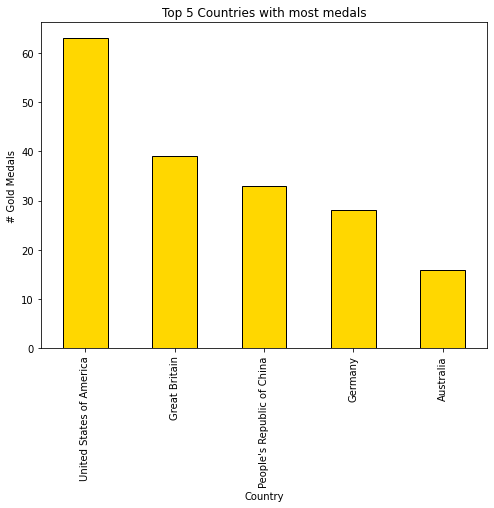

In [25]:
# Produce a medals table showing which countries gained the most of Gold, Silver and Bronze medals. ✔
import matplotlib.pyplot as plt

gold_medals = olympics_df.dropna(subset = ['Gold'])

plt.rcParams['figure.figsize'] = (8,6)
gold_medals['Country'].value_counts().nlargest(5).plot(kind = 'bar', linewidth = 1, facecolor = 'gold', edgecolor = 'k')
plt.title('Top 5 Countries with most medals')
plt.xlabel('Country')
plt.ylabel('# Gold Medals')
plt.show()

In [26]:
# Table style
gold_medals['Country'].value_counts()

United States of America                  63
Great Britain                             39
People's Republic of China                33
Germany                                   28
Australia                                 16
Republic of Korea                         14
Italy                                     12
Russian Federation                        10
France                                    10
Hungary                                   10
South Africa                               6
Ukraine                                    6
Kazakhstan                                 6
New Zealand                                5
Democratic People's Republic  of Korea     4
Belarus                                    4
Japan                                      4
Islamic Republic of Iran                   3
Netherlands                                3
Denmark                                    3
Switzerland                                2
Jamaica                                    2
Sweden    

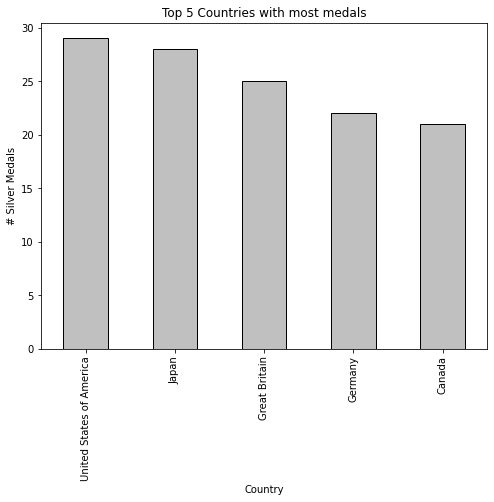

In [27]:
silver_medals = olympics_df.dropna(subset = ['Silver'])

plt.rcParams['figure.figsize'] = (8,6)
silver_medals['Country'].value_counts().nlargest(5).plot(kind = 'bar', linewidth = 1, facecolor = 'silver', edgecolor = 'k')
plt.title('Top 5 Countries with most medals')
plt.xlabel('Country')
plt.ylabel('# Silver Medals')
plt.show()

In [28]:
# Table style
silver_medals['Country'].value_counts()

United States of America      29
Japan                         28
Great Britain                 25
Germany                       22
Canada                        21
People's Republic of China    21
Australia                     21
Spain                         16
France                        15
Russian Federation            14
Netherlands                   10
Hungary                        8
Republic of Korea              7
Italy                          7
Romania                        6
Mexico                         5
Denmark                        5
Czech Republic                 4
Croatia                        3
Sweden                         3
Islamic Republic of Iran       3
Brazil                         3
Belarus                        3
Colombia                       3
New Zealand                    3
Azerbaijan                     2
Portugal                       2
Egypt                          2
Jamaica                        2
Finland                        1
Kenya     

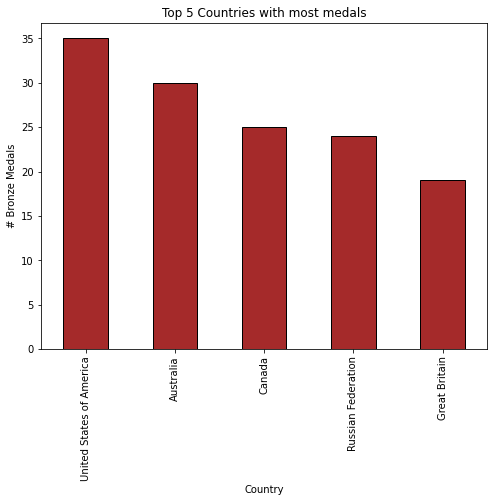

In [29]:
bronze_medals = olympics_df.dropna(subset = ['Bronze'])

plt.rcParams['figure.figsize'] = (8,6)
bronze_medals['Country'].value_counts().nlargest(5).plot(kind = 'bar', linewidth = 1, facecolor = 'brown', edgecolor = 'k')
plt.title('Top 5 Countries with most medals')
plt.xlabel('Country')
plt.ylabel('# Bronze Medals')
plt.show()

In [30]:
# Table style
bronze_medals['Country'].value_counts()

United States of America                  35
Australia                                 30
Canada                                    25
Russian Federation                        24
Great Britain                             19
People's Republic of China                17
Japan                                     17
Netherlands                               16
Germany                                   16
France                                    14
New Zealand                               13
Republic of Korea                          8
Poland                                     8
Denmark                                    8
Belarus                                    7
Brazil                                     7
Italy                                      7
Czech Republic                             6
Ukraine                                    4
Slovakia                                   4
Singapore                                  3
Greece                                     3
Slovenia  

## The Challenge

By adding your own code in your own Jupyter Notebook cells below (you can add a cell by pressing the `+` button in the toolbar), try and answer some of the following questions about this data set:
* How many rows are in this data set? ✔
* Apply some filtering to remove rows that might be incomplete or have errors. How many rows remain after your filters are applied? ✔
* How many atheletes are in the data set? ✔
* Which athlete competed in the most events? ✔
* How many countries are present in the data set? ✔
* Which country fielded the most athletes? ✔
* Produce a medals table showing which countries gained the most of Gold, Silver and Bronze medals. ✔
* What is the average age, height, and weight for each country's olympic teams? ✔
* As per last question, but by Male and Female athletes. ✔
* Finally, calculate the [Body Mass Index (BMI)](https://en.wikipedia.org/wiki/Body_mass_index) for each athlete in the data set, and display the top 10 rows for male athletes, and again for female athletes. ✔

If you comfortably work out answers for all of these, feel free to add your own analyses!

---
You're done with Lab 4b!

Choose **Save and Checkpoint** from the **File** menu to save your work.

If you are running the labs in Binder (on the cloud), then choose **Download as Notebook** and save it to your computer. 

Now *ZIP* all two Lab 4 notebooks together into one file and [upload it to Studium](https://uppsala.instructure.com/courses/26106/assignments/37618).